In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Load dataset (Replace with actual file path if needed)
df = pd.read_csv(r"D:\JOB\1 Pricing analyst\1 Price elasticity & demand forecasting\1 Loglog regression\pricing_elasticity_dataset.csv")

In [3]:
df

,price,demand,competitor_price,seasonality_effect
0,21.854305,221.348563,20.826508,0.000000e+00
1,47.782144,99.172765,44.256094,1.570951e-01
2,37.939727,134.046262,36.382167,3.141886e-01
3,31.939632,151.147236,30.418165,4.712790e-01
4,12.020839,422.135887,12.351920,6.283648e-01
...,...,...,...,...
9995,43.594519,113.924330,44.057349,-6.283648e-01
9996,45.387898,113.652221,44.912617,-4.712790e-01
9997,47.601856,109.696323,52.056889,-3.141886e-01
9998,22.886960,214.821272,22.722774,-1.570951e-01


In [4]:
# Log transformation of Price and Demand
df["log_price"] = np.log(df["price"])
df["log_demand"] = np.log(df["demand"])


In [5]:
df

,price,demand,competitor_price,seasonality_effect,log_price,log_demand
0,21.854305,221.348563,20.826508,0.000000e+00,3.084398,5.399739
1,47.782144,99.172765,44.256094,1.570951e-01,3.866652,4.596863
2,37.939727,134.046262,36.382167,3.141886e-01,3.635999,4.898185
3,31.939632,151.147236,30.418165,4.712790e-01,3.463848,5.018254
4,12.020839,422.135887,12.351920,6.283648e-01,2.486642,6.045327
...,...,...,...,...,...,...
9995,43.594519,113.924330,44.057349,-6.283648e-01,3.774931,4.735534
9996,45.387898,113.652221,44.912617,-4.712790e-01,3.815245,4.733143
9997,47.601856,109.696323,52.056889,-3.141886e-01,3.862872,4.697716
9998,22.886960,214.821272,22.722774,-1.570951e-01,3.130567,5.369806


In [11]:
# Prepare independent and dependent variables
X = df.drop(columns=["log_demand"])  # Features
y = df[["log_demand"]]  # Target variable


In [13]:
X

,price,demand,competitor_price,seasonality_effect,log_price
0,21.854305,221.348563,20.826508,0.000000e+00,3.084398
1,47.782144,99.172765,44.256094,1.570951e-01,3.866652
2,37.939727,134.046262,36.382167,3.141886e-01,3.635999
3,31.939632,151.147236,30.418165,4.712790e-01,3.463848
4,12.020839,422.135887,12.351920,6.283648e-01,2.486642
...,...,...,...,...,...
9995,43.594519,113.924330,44.057349,-6.283648e-01,3.774931
9996,45.387898,113.652221,44.912617,-4.712790e-01,3.815245
9997,47.601856,109.696323,52.056889,-3.141886e-01,3.862872
9998,22.886960,214.821272,22.722774,-1.570951e-01,3.130567


In [14]:
# Add constant for regression intercept
X = sm.add_constant(X)

In [15]:
X

,const,price,demand,competitor_price,seasonality_effect,log_price
0,1.0,21.854305,221.348563,20.826508,0.000000e+00,3.084398
1,1.0,47.782144,99.172765,44.256094,1.570951e-01,3.866652
2,1.0,37.939727,134.046262,36.382167,3.141886e-01,3.635999
3,1.0,31.939632,151.147236,30.418165,4.712790e-01,3.463848
4,1.0,12.020839,422.135887,12.351920,6.283648e-01,2.486642
...,...,...,...,...,...,...
9995,1.0,43.594519,113.924330,44.057349,-6.283648e-01,3.774931
9996,1.0,45.387898,113.652221,44.912617,-4.712790e-01,3.815245
9997,1.0,47.601856,109.696323,52.056889,-3.141886e-01,3.862872
9998,1.0,22.886960,214.821272,22.722774,-1.570951e-01,3.130567


In [16]:
# Fit Log-Log Regression model
model = sm.OLS(y, X).fit()

In [17]:
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 7.268e+04
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:26:04   Log-Likelihood:                 8275.7
No. Observations:               10000   AIC:                        -1.654e+04
Df Residuals:                    9994   BIC:                        -1.650e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.8726      0

In [18]:
# Extract price elasticity coefficient
elasticity = model.params["log_price"]
print(f"Estimated Price Elasticity of Demand: {elasticity:.2f}")

Estimated Price Elasticity of Demand: -0.76


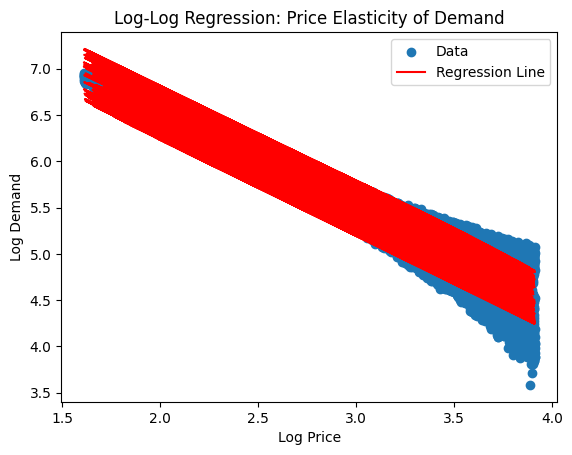

In [19]:
# Scatter plot with regression line
plt.scatter(df["log_price"], df["log_demand"], label="Data")
plt.plot(df["log_price"], model.predict(X), color='red', label="Regression Line")
plt.xlabel("Log Price")
plt.ylabel("Log Demand")
plt.title("Log-Log Regression: Price Elasticity of Demand")
plt.legend()
plt.show()